## 3. Distribuciones

In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [4]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [5]:
dataset = pandas.read_csv('hfi_cc_2018.csv')

In [6]:
important_cols = ['year', 'ISO_code', 'countries', 'region']
important_cols += [col for col in dataset.columns if 'pf_identity' in col]
important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [7]:
w_dataset = dataset[important_cols]
w_dataset.head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


### 1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

In [30]:
## Filtro por pf_identity remuevo los valores NaN
pf_identity_cleaned = w_dataset['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_cleaned.describe()

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

In [9]:
## Filtro por hf_score remuevo los valores NaN
hf_score_cleaned = w_dataset['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_cleaned.describe()

count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

In [10]:
## Filtro Latam por region Latinoamerica y Caribe
latam = w_dataset[w_dataset['region'] == 'Latin America & the Caribbean']
## Filtro por pf_identity y remuevo valores NaN
pf_identity_latam_cleaned = latam['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_latam_cleaned.describe()

count    232.000000
mean       8.765086
std        1.711732
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

In [11]:
## Filtro Latam por hf_score y remuevo valores NaN
hf_score_latam_cleaned = latam['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_latam_cleaned.describe()

count    232.000000
mean       7.047982
std        0.608904
min        4.200724
25%        6.779311
50%        7.028045
75%        7.339903
max        8.290152
Name: hf_score, dtype: float64

**- Histograma de Distribucion de la variable *pf_identity***

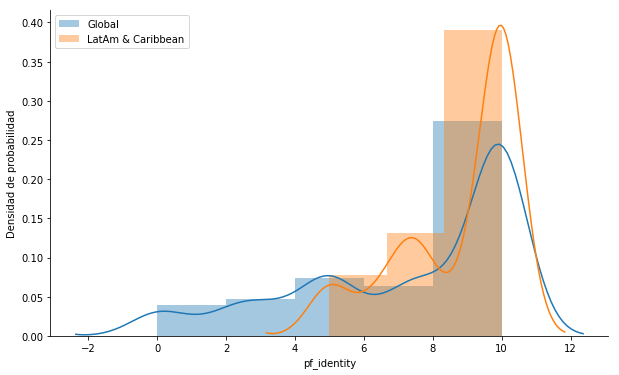

In [28]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "pf_identity" a nivel Global 
seaborn.distplot(pf_identity_cleaned, kde=True, bins=5, label='Global')

## Grafico la distribucion del puntaje "pf_identity" a nivel LatinoAmerica y Caribe 
seaborn.distplot(pf_identity_latam_cleaned, kde=True, bins=3, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

**- Histograma de Distribucion de la variable *hf_score***

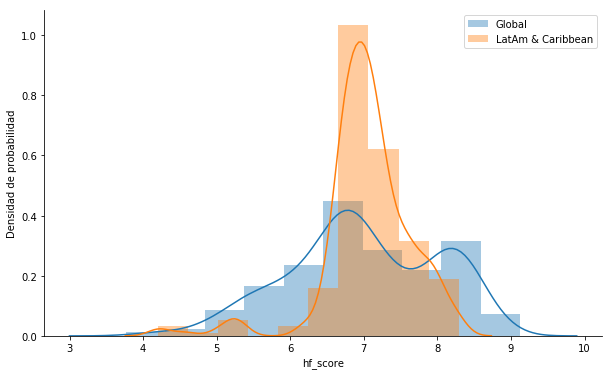

In [13]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "hf_score" a nivel Global 
seaborn.distplot(hf_score_cleaned, kde=True, bins=10, label='Global')

## Grafico la distribucion del puntaje "hf_score" a nivel LatinoAmerica y Caribe 
seaborn.distplot(hf_score_latam_cleaned, kde=True, bins=10, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

**1. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?**

Parecería ser de distribucion Normal: muy sesgada en el caso de *pf_identity*. Mientras que en el caso de *hf_score*, la curva se asemeja más a una campana de Gauss "clásica". Lo que salta a la vista tras ver las los graficos es como si existiera una superposicion de 2 o más gaussianas, lo que insentiva a indagar un poco mas profundo en los registros. Se propone, entonces, presentar un par de nuevos graficos con los puntajes de cada pais de Latinoamerica y El Caribe y analizar así cuales de ellos son los responsables de "deformar" la curva normal clasica:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

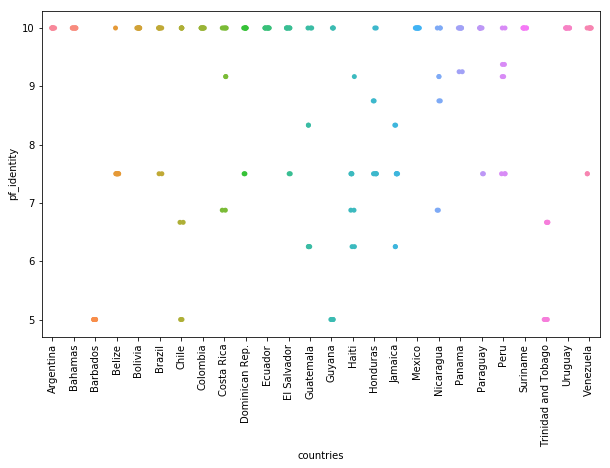

In [26]:
# Stripplot de la variable "pf_identity" para LatAm y el Caribe
plt.figure(figsize=(10,6))
seaborn.stripplot(data=latam, x="countries", y="pf_identity", jitter=True)
plt.xticks(rotation=90)
#plt.ylim([0,10])

Podemos observar como los paises se dividen en un grupo que poseen puntaje alto, otros puntaje medio, quedando Chile, Barbados, Guyana y Trinidad y Tobago como los de menor puntaje. Esto se corresponde con los 3 "picos" que vemos en el grafico de distribucion. No podriamos dejar pasar el analisis de este grafico no sin antes comentar que resulta llamativo el hecho que Chile se encuentre tan alejado, en terminos de pf_identity, de paises como Uruguay y Argentina, que comparten estilos de vida similares.

(0, 10)

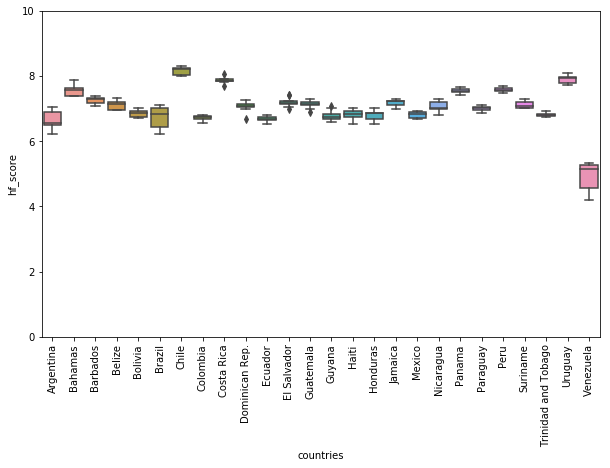

In [27]:
## Boxplot de la variable "hf_score" para LatAm y el Caribe
plt.figure(figsize=(10,6))
seaborn.boxplot(data=latam, x="countries", y="hf_score")
plt.xticks(rotation=90)
plt.ylim([0,10])

En este caso, vemos como Venezuela esta claramente lejos del resto de los paises, correspondiendose con el "pico" mas bajo que vemos en el grafico de distribucion (la interpretacion que se le da esto es la dificil situacion socioeconomica que atraviesa el pais, especialmente desde el 2014).

Luego la gran mayoria de los paises se focalizan en valores medios-altos (el "pico" central) y vemos otra vez a Chile, esta vez acompañado por Uruguay, Costa Rica, Panama y Peru, como poseen valores ligeramente por encima de la media, haciendo referencia de esta forma al pequeño abultamiento que vemos en la cola del gráfico de distribucion. Con respecto a los valores que posee Chile y Uruguay podemos llegar a suponer que se debe a que atraviesan un buen pasar económico y social, sin embargo no hace falta ser un sociólogo o politólogo para saber que tal vez no es tan asi como lo muestran dichos valores; por lo que podemos suponer que no representan la realidad de forma demasiado acertada. El hecho que Costa Rica, Panamá y Perú acompañen a nuestros paises vecinos recien nombrados no hace mas que incrementar nuestras sospechas de que los valores de hf_score de nuestra muestras no son muy de fiar.

Dado estos resultados, y ratificando los deducido en los items 1 y 2 de este práctico, se decide entonces volver a presentar los graficos de distribucion pero tomando las siguientes medidas:
- En el caso de Latinoamerica y el Caribe:
    - Se decide excluir a Venezuela, Chile, Costa Rica, Panama y Peru para los siguientes analisis sobre hf_score.
- En el caso del resto del mundo:
    - Se decide excluir a Iran, Siria, Libia, Yemen y Venezuela para los siguientes analisis sobre hf_score.

In [17]:
## Excluyo Venezuela, Chile, Costa Rica, Panama y Peru, filtro por hf_score y remuevo valores NaN
hf_score_latam_cleaned_wo_outliers = latam[latam.countries != "Venezuela"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Chile"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Costa Rica"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Panama"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Peru"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers['hf_score'].dropna()
hf_score_latam_cleaned_wo_outliers.describe()

count    187.000000
mean       7.009078
std        0.336987
min        6.207145
25%        6.768122
50%        6.995549
75%        7.177543
max        8.073788
Name: hf_score, dtype: float64

In [18]:
## Excluyo a Iran, Siria, Libia, Yemen y Venezuela, filtro por hf_score y remuevo valores NaN
hf_score_cleaned_wo_outliers = w_dataset[w_dataset.countries != "Iran"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Syria"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Libya"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Yemen, Rep."]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Venezuela"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers['hf_score'].dropna()
hf_score_cleaned_wo_outliers.describe()

count    1340.000000
mean        7.055563
std         0.966867
min         4.258014
25%         6.413465
50%         6.954874
75%         7.931989
max         9.126313
Name: hf_score, dtype: float64

**- Histograma de Distribucion de la variable *hf_score* sin outliers**

Tras analizar los datos, se vuelve a hacer el grafico de deistribucion para *hf_score*, pero esta vez sin outliers:

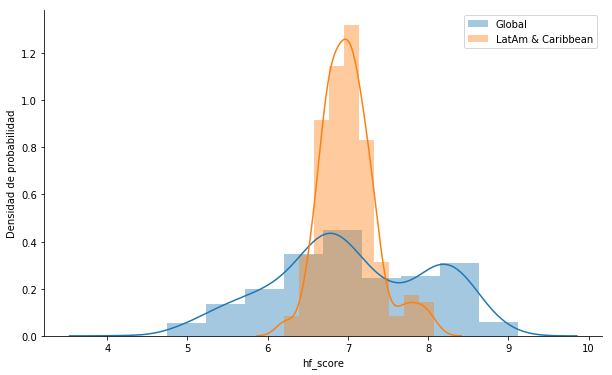

In [20]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "hf_score" a nivel Global 
seaborn.distplot(hf_score_cleaned_wo_outliers, kde=True, bins=10, label='Global')

## Grafico la distribucion del puntaje "hf_score" a nivel LatinoAmerica y Caribe 
seaborn.distplot(hf_score_latam_cleaned_wo_outliers, kde=True, bins=10, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

### 2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [31]:
from scipy.stats import zscore
## Prueba de Kolmogorov-Smirnof para *pf_identity* (latam)
pf_identity_latam_cleaned_norm = zscore(pf_identity_latam_cleaned)
stats.kstest(pf_identity_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.3513672528496658, pvalue=4.08023938470139e-26)

In [32]:
## Prueba de Kolmogorov-Smirnof para *hf_score* (latam)
hf_score_latam_cleaned_norm = zscore(hf_score_latam_cleaned_wo_outliers)
#hf_score_latam_cleaned_norm.describe()
stats.kstest(hf_score_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.07232950693258844, pvalue=0.2693691087384836)

Dado los valores cercanos a 0 de *pvalue* no podemos afirmar que las distribuciones sean normales para ninguna de las 2 variables.

### 3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

En esta seccion realizamos un grafico QQ para comparar las distribuciones de *pf_identity* contra *hf_score*:

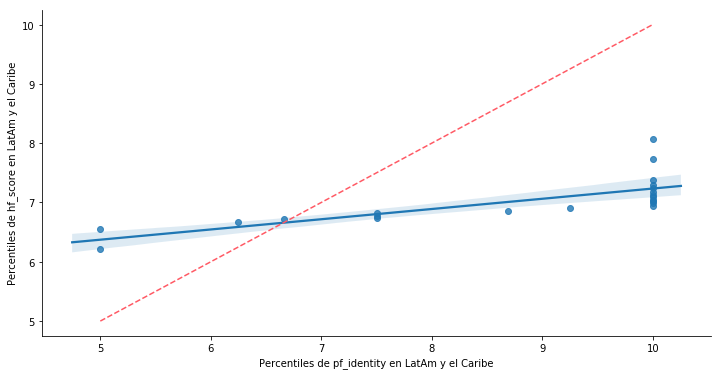

In [41]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos cuartiles igualmente distribuidos entre 0 y 100.
qn_pf_identity_latam_cleaned = numpy.percentile(pf_identity_latam_cleaned, percs)
qn_hf_score_latam_cleaned = numpy.percentile(hf_score_latam_cleaned_wo_outliers, percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_pf_identity_latam_cleaned, y=qn_hf_score_latam_cleaned)
plt.xlabel('Percentiles de pf_identity en LatAm y el Caribe')
plt.ylabel('Percentiles de hf_score en LatAm y el Caribe')

# Graficamos la linea de la identidad.
x = numpy.linspace(numpy.min((qn_pf_identity_latam_cleaned.min(),qn_hf_score_latam_cleaned.min())), numpy.max((qn_pf_identity_latam_cleaned.max(),qn_hf_score_latam_cleaned.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

Vemos que ambas distribuciones están relacionadas linealmente, dado que los puntos del gráfico QQ estan ligeramente alineados, aunque no en la dirección de la identidad. En este caso, como la tendencia del gráfico está por debajo de la identidad, la distribución del eje x (*pf_identity*) es más dispersa que la de *hf_score*

Proponemos a continuacion comparar a cada una de las distribuciones de las variables bajo investigacion contra una distribucion normal ideal:

**Comparacion con grafico QQ entre distribucion normal y *pf_identity***

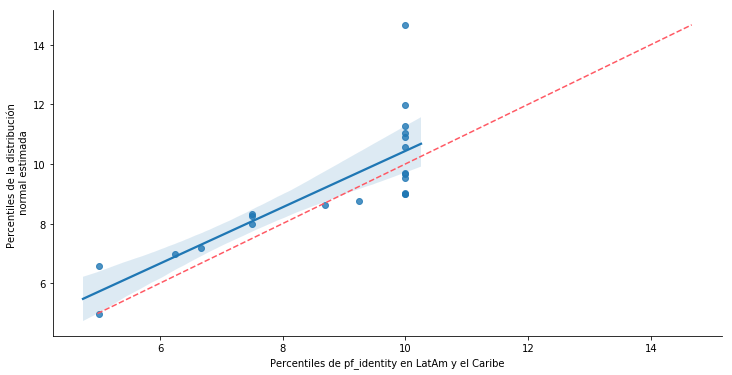

In [43]:
loc, scale = stats.norm.fit(qn_pf_identity_latam_cleaned)
norm_dist = stats.norm(loc, scale)
qn_norm_dist_len_pf_identity = numpy.percentile(norm_dist.rvs(len(qn_pf_identity_latam_cleaned)), percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_pf_identity_latam_cleaned, y=qn_norm_dist_len_pf_identity)
plt.xlabel('Percentiles de pf_identity en LatAm y el Caribe')
plt.ylabel('Percentiles de la distribución \n normal estimada')

# Graficamos la linea de la identidad.
x = numpy.linspace(numpy.min((qn_pf_identity_latam_cleaned.min(),qn_norm_dist_len_pf_identity.min())), numpy.max((qn_pf_identity_latam_cleaned.max(),qn_norm_dist_len_pf_identity.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

**Comparacion con grafico QQ entre distribucion normal y *hf_score***

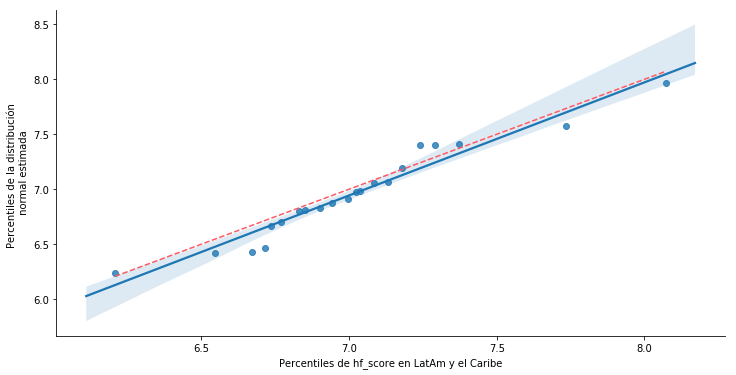

In [44]:
loc, scale = stats.norm.fit(qn_hf_score_latam_cleaned)
norm_dist = stats.norm(loc, scale)
qn_norm_dist_len_hf_score = numpy.percentile(norm_dist.rvs(len(qn_hf_score_latam_cleaned)), percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_hf_score_latam_cleaned, y=qn_norm_dist_len_hf_score)
plt.xlabel('Percentiles de hf_score en LatAm y el Caribe')
plt.ylabel('Percentiles de la distribución \n normal estimada')

# Graficamos la linea de la identidad.
x = numpy.linspace(numpy.min((qn_hf_score_latam_cleaned.min(),qn_norm_dist_len_hf_score.min())), numpy.max((qn_hf_score_latam_cleaned.max(),qn_norm_dist_len_hf_score.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

Como podemos ver, en el caso de *pf_identity* vcemos que hay un cierta tendencia a una normal, pero hay una gran acumulacion de datos en el valor 10.

Contrariamente, *hf_score* vemos que comparando contra una normal sus distribuciones se asemejan mucho mas.

### 4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [47]:
print("pf_identity_skew =", pf_identity_latam_cleaned.skew())
print("pf_identity_kurtosis =", pf_identity_latam_cleaned.kurtosis())

pf_identity_skew = -1.0546753270192766
pf_identity_kurtosis = -0.2754545895278522


In [49]:
print("hf_score_skew =", hf_score_latam_cleaned_wo_outliers.skew())
print("hf_score_kurtosis =", hf_score_latam_cleaned_wo_outliers.kurtosis())

hf_score_skew = 0.7540659843787029
hf_score_kurtosis = 1.1952226799663976


Como vemos, el valor de Skew es negativo en el caso de *pf_identity*, denotando una asimetria, es decir, la cola de la distribución se alarga para valores inferiores a la media. Esto se ve claramente en todos los graficos realizados para esta variable. Por otro lado, para *hf_score* el valor de skew es mas cercano a 0 por lo que no es tan asimetrica como la variable anterior, sin embargo, dado su valor porsitivo, indica que la cola de distribucion posee un leve sesgo  hacia valores superiores a la media.


En lo que respecta a Kurtosis, vemos por un lado en el valor de pf_identity_kurtosis un numero pequeño,  implicando un cierto achatamiento de la campana de Gauss sobre la media. En el caso del valor de hf_score_kurtosis, vemos una mayor concentracion de valores sobre la media, lo cual se corresponde son su alto valor de Kurtosis en comparacion a pf_identity_kurtosis.


Relacionandolo con el grafico QQ vemos en el caso de los valores de skew como la simetria esta relacionado con la distribucion de los puntos sobre el plano:
- En el caso de *hf_score* se ve una distribucion mas uniforme de los puntos, lo cual es afín con el pequeño valor de skew. 
- Para *pf_identity* esta relacion ente la distribucion de los puntos y el valor de skew tambien se da, esta vez no por la uniformidad en la ubicaacion de los puntos, sino por la falta de ella, relacionandose asi con el valor mas alejado de 0 de skew en esta ocacion.
Con respecto la kurtosis podemos decir que sus valor se relacion dado la mayor o menor cercania de la ubicacion de los puntos con respecto a la identidad.


El grafico QQ brinda entonces informacion que se corresponde con los valroes de skew y kurtosis, pero ademas presenta visualmente al lector una forma mas intuitiva de comprender dichos datos. Ademas mediante la comparacion de las distribuciones de *pf_identity* y *hf_score* entre ellas, brinda una grafico que permita sacar conclusiones que de otra manera con los valores numericos de skew y kurtosis no hubiera sido posible llegar.


## ___________________________________________________________